# **OpenCV for Computer Vision: From Basic to Advanced**

This notebook is a beginner-friendly tutorial for learning OpenCV before diving into YOLO. It provides a step-by-step guide to mastering the basics of OpenCV, a powerful library for computer vision

## Table of Contents
1. [Installation](#installation)
2. [Basic Image Operations](#basic-image-operations)
3. [Image Processing](#image-processing)
4. [Video Processing](#video-processing)
5. [Feature Detection and Matching](#feature-detection-and-matching)
6. [Object Detection](#object-detection)
7. [Advanced Topics](#advanced-topics) (soon!)

---

## 1. Installation <a name="installation"></a>

Install OpenCV using pip:

```bash
pip install opencv-python
pip install opencv-contrib-python
```

## 2. Basic Image Operations <a name="basic-image-operations"></a>
Import OpenCV

In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Read and Display an Image

In [46]:
# Read an image
image = cv2.imread('car.jpg')

# Display the image

# Window name, image
cv2.imshow('Image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Convert to Grayscale

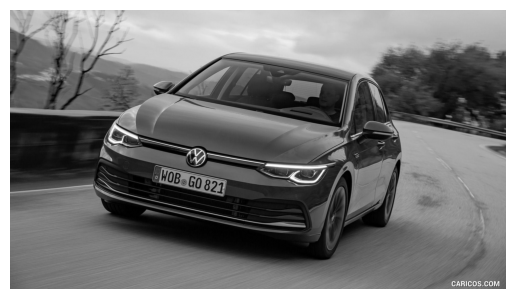

In [63]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.show()

Resize and Crop

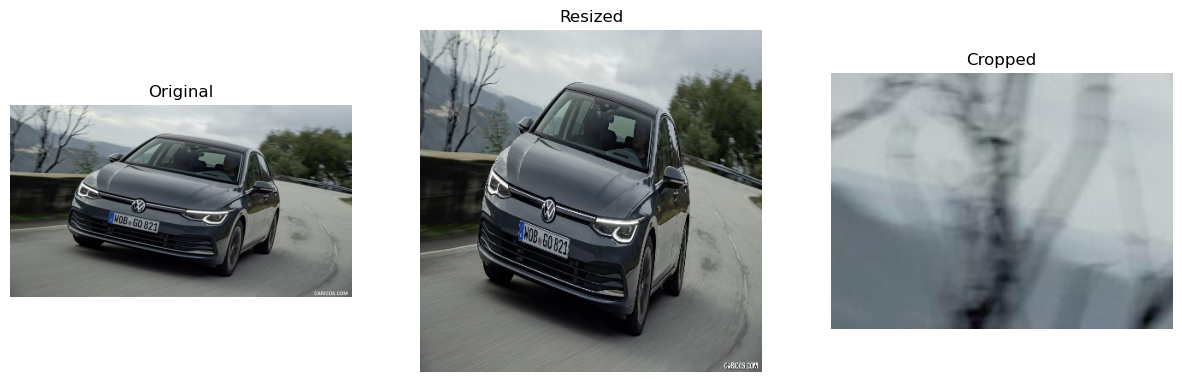

In [48]:
# Resize
resized_image = cv2.resize(image, (400, 400))

# Crop
cropped_image = image[50:200, 100:300]  # (y1:y2, x1:x2)

# Prepare subplots
subplots = [image, resized_image, cropped_image]
titles = ['Original', 'Resized', 'Cropped']
subplots = [cv2.cvtColor(i, cv2.COLOR_BGR2RGB) for i in subplots]

# Plot images
plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(subplots[i])
    plt.title(titles[i])
    plt.axis('off')
plt.show()

## 3. Image Processing <a name="image-processing"></a>

Gaussian Blur

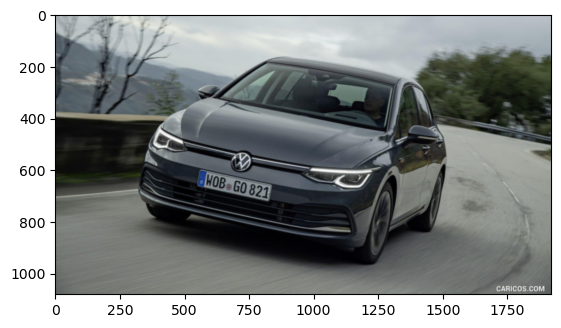

In [72]:
blurred_image = cv2.GaussianBlur(image, (7, 7), 0)
plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
plt.show()

Edge Detection (Canny)

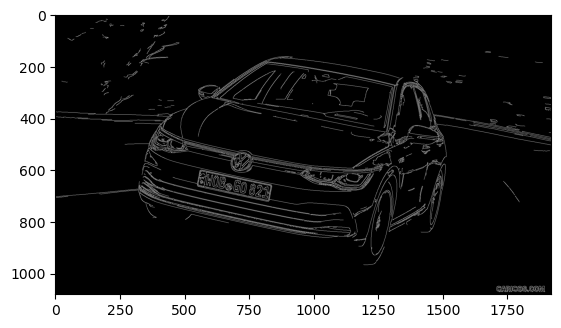

In [74]:
edges = cv2.Canny(image, 100, 200)
plt.imshow(edges, cmap='gray')
plt.show()

Thresholding


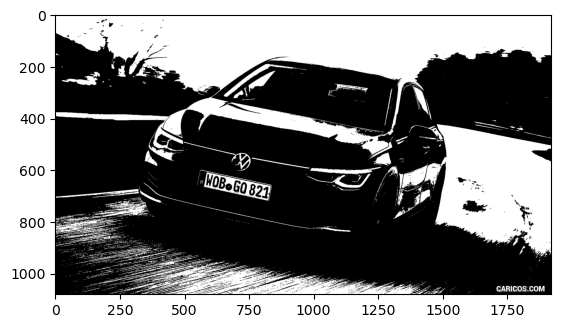

In [51]:
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
plt.imshow(binary_image, cmap='gray')
plt.show()

## 4. Video Processing <a name="video-processing"></a>

Capture Video from Webcam


In [75]:
cap = cv2.VideoCapture(0)  # 0 for default camera

while True:
    ret, frame = cap.read()
    cv2.imshow('Webcam', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):  # Press 'q' to quit
        break

cap.release()
cv2.destroyAllWindows()

[ WARN:0@2260.881] global cap_gstreamer.cpp:1173 isPipelinePlaying OpenCV | GStreamer warning: GStreamer: pipeline have not been created


Save Video


In [76]:
out = cv2.VideoWriter('output.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 30, (640, 480))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    out.write(frame)

out.release()

## 5. Feature Detection and Matching <a name="feature-detection-and-matching"></a>

ORB Feature Detection


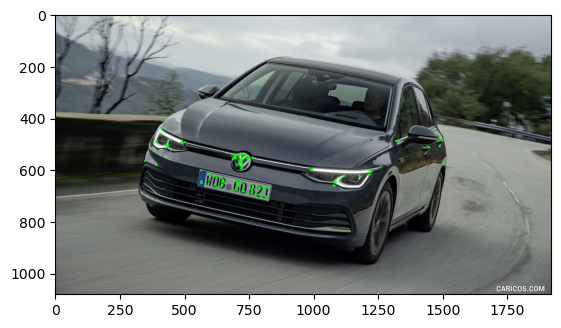

In [54]:
orb = cv2.ORB_create()
keypoints, descriptors = orb.detectAndCompute(gray_image, None)

# Draw keypoints
output_image = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0))
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.show()

Feature Matching


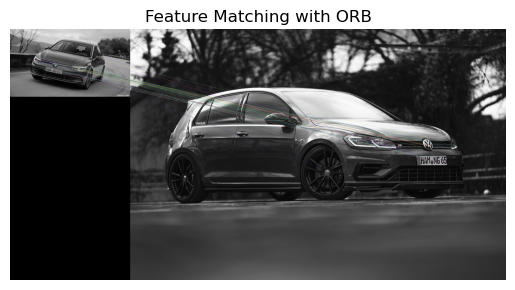

In [82]:
# Load two images
image1 = cv2.imread('car.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('car2.jpg', cv2.IMREAD_GRAYSCALE)


# Detect keypoints and compute descriptors for both images
keypoints1, descriptors1 = orb.detectAndCompute(image1, None)
keypoints2, descriptors2 = orb.detectAndCompute(image2, None)

# Match descriptors
matches = bf.match(descriptors1, descriptors2)

# Sort matches by distance (best matches first)
matches = sorted(matches, key=lambda x: x.distance)

# Draw the first 50 matches
matched_image = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the result
plt.imshow(cv2.cvtColor(matched_image, cv2.COLOR_BGR2RGB))
plt.title('Feature Matching with ORB')
plt.axis('off')
plt.show()


## 6. Object Detection <a name="object-detection"></a>


YOLO Object Detection



0: 384x640 1 car, 10.0ms
Speed: 1.6ms preprocess, 10.0ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


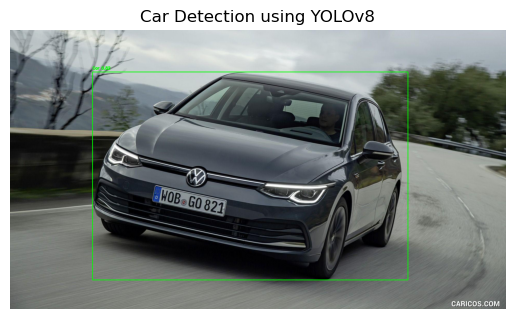

In [107]:
from ultralytics import YOLO

# Load the YOLOv8 model
model = YOLO('yolov8n.pt')  # Use 'yolov8n.pt' for the nano model (smallest and fastest)

# Load the image
image_path = 'car.jpg'  # Replace with your image path
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is None:
    print(f"Error: Image '{image_path}' not found. Please check the file path.")
    exit()

# Perform object detection
results = model(image)

# Process results
for result in results:
    # Get bounding boxes, class IDs, and confidence scores
    boxes = result.boxes.xyxy.cpu().numpy()  # Bounding box coordinates (x1, y1, x2, y2)
    class_ids = result.boxes.cls.cpu().numpy()  # Class IDs
    confidences = result.boxes.conf.cpu().numpy()  # Confidence scores

    # Draw bounding boxes and labels on the image
    for box, class_id, confidence in zip(boxes, class_ids, confidences):
        if confidence > 0.5 and model.names[int(class_id)] == 'car':  # Detect only cars
            x1, y1, x2, y2 = map(int, box)  # Convert coordinates to integers
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Draw bounding box
            label = f"Car {confidence:.2f}"
            cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Display the result
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Car Detection using YOLOv8')
plt.axis('off')  # Hide axes
plt.show()

This notebook provides a comprehensive guide to OpenCV for Computer Vision. Run each cell to see the results!


---

### How to Use:
1. Copy the entire content above.
2. Open a new Jupyter Notebook.
3. Paste the content into the notebook.
4. Run each cell to see the results.
